In [1]:
#importing lib
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#seting styles 
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
#reading csv file 
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

Starting EDA - before training model we need to observe and analyse the data to see what we are going to work with
the goal here is to observe the data and have proper understanding of the variables distributions 






In [3]:
pd.set_option('display.float',"{:,.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


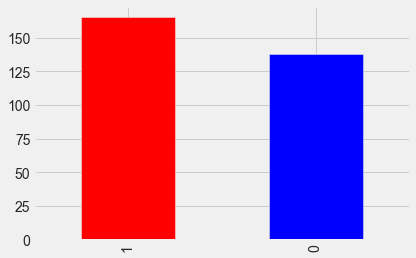

In [4]:
#ploting target variables on bar chart so we can have idea about the proprtion of positive and negative classes...

df.target.value_counts().plot(kind='bar', color = ['r','b'],)


In [5]:
df.isna().sum()

#as we can see there is no null values in dataset so it's seems perfect to work...

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#categorical variables 

categorical_val = []

continous_val = []


for column in df.columns:
    print('==========================')
    print(f'{column} : {df[column].unique()}')
    
    if len(df[column].unique()) <= len(df)/20:
        
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [7]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

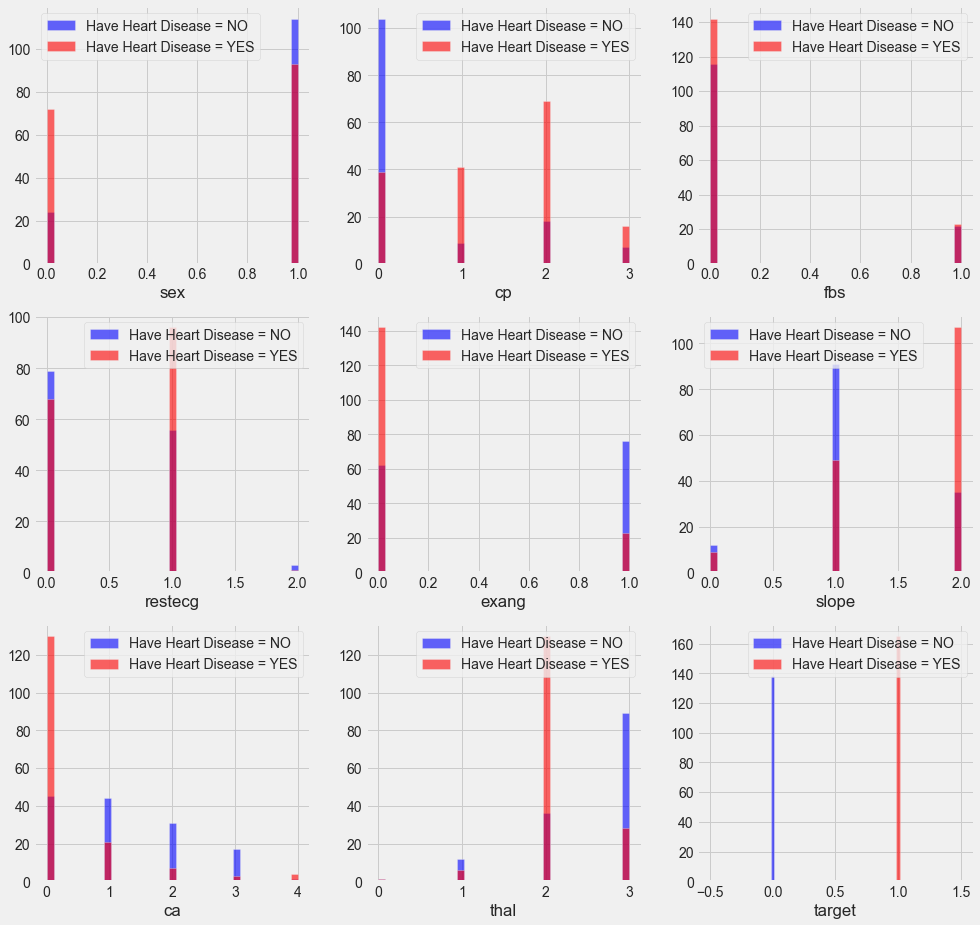

In [9]:
plt.figure(figsize=(15,15))


for i , column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    
    df[df['target']==0][column].hist(bins=35,color ='b',label='Have Heart Disease = NO', alpha =0.6)
    df[df['target']==1][column].hist(bins=35,color ='r',label='Have Heart Disease = YES', alpha =0.6)
    
    plt.legend()
    plt.xlabel(column)

1. CP {Chest Pain} : People with cp 1,2,3 are more likely to have Heart disease than people with cp =0 

2. restecg {resting ecg results } : people with a value of 1 are more likely to have heart disease. 

3. exang { exercise - induced angina} : people with value of 0 are more likely to have heart disease.

4. ca { number of major vessels stained by fluoroscopy}: so more blood movement the better, the ca zero are more likely to have heart disease. 

5. thal {thalium stress result}: people with that value of 2 are more likely to have heart disease. 


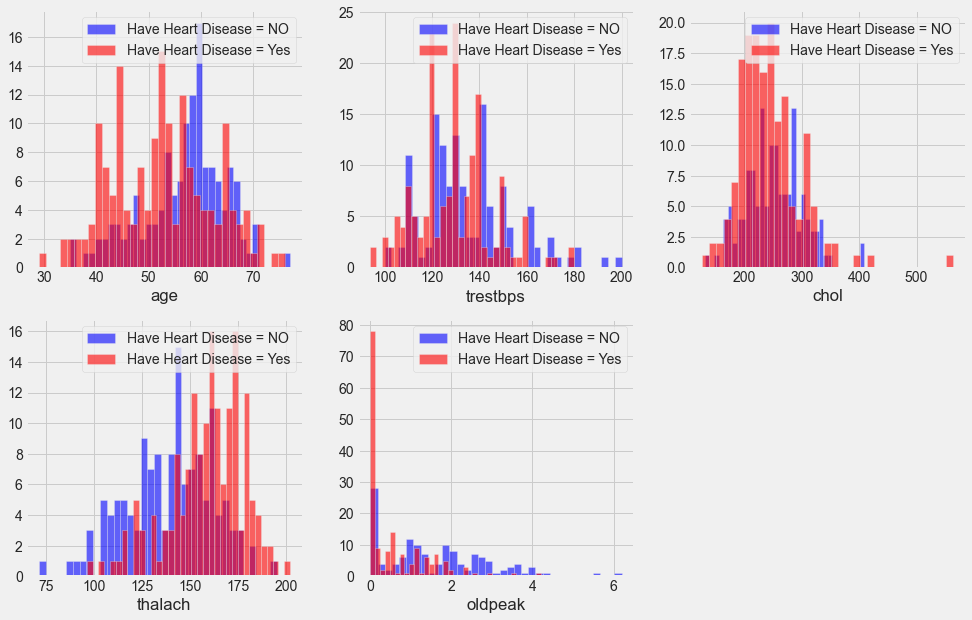

In [10]:
plt.figure(figsize=(15,15))


for i, column in enumerate(continous_val,1):
    
    plt.subplot(3,3,i)
    
    df[df['target']==0][column].hist(bins = 35, color = 'blue', label = 'Have Heart Disease = NO', alpha =0.6)
    df[df['target']==1][column].hist(bins = 35, color = 'red', label = 'Have Heart Disease = Yes', alpha =0.6)
    
    
    plt.legend()
    plt.xlabel(column)

1. chol : greater than 200 is concern

2. thalach : People with max of over 140 are more likely to have heart disease 


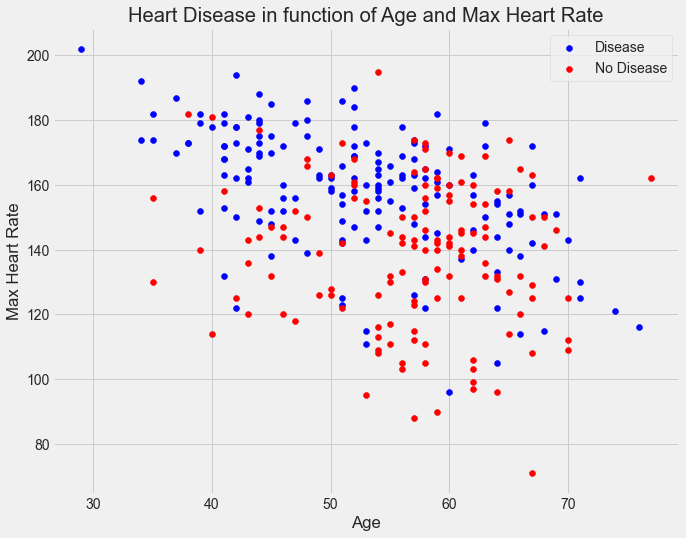

In [11]:
plt.figure(figsize=(10,8))


#scatter plot with postive example 

plt.scatter(df.age[df.target ==1], df.thalach[df.target==1] , c= 'b')



#scatter plot with neagtive example 

plt.scatter(df.age[df.target == 0], df.thalach[df.target==0], c= 'r')


#add some helpful info label 

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])



At lower age High Heart is more responsible for Disease but if age increase lower heart rate is also being responisble for it.

(-0.5, 14.5)

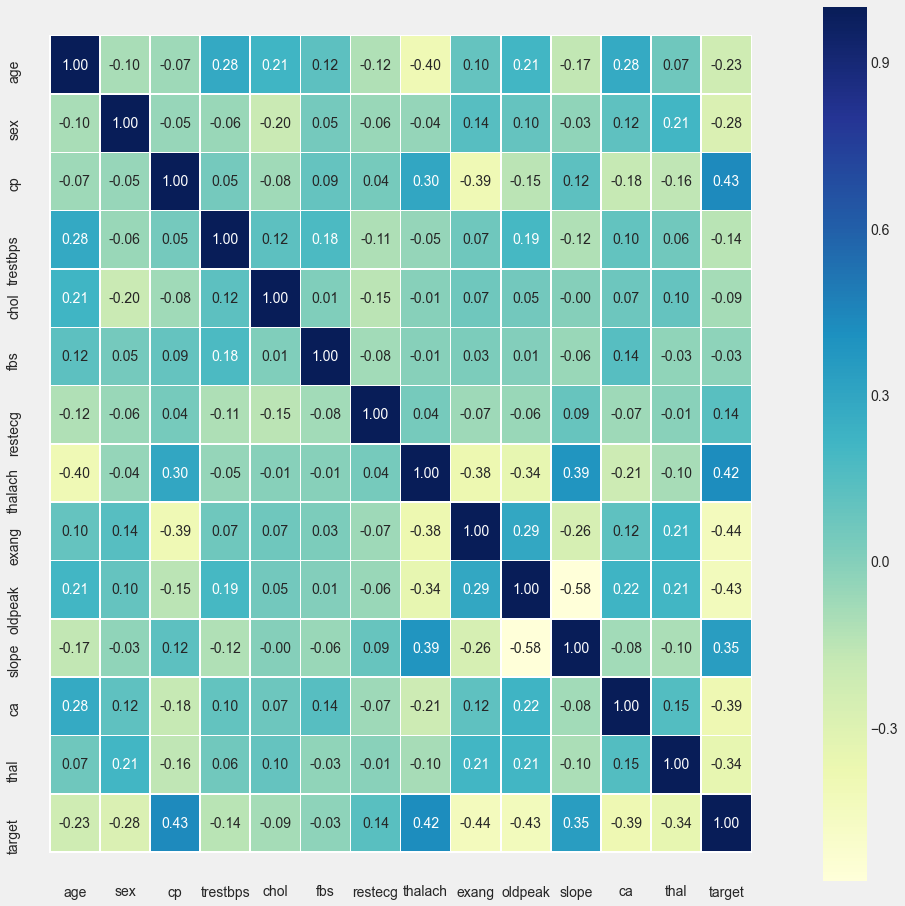

In [12]:
#let's make our correlation matrix a little prettier :D 

corr_matrix = df.corr()

fig , ax = plt.subplots(figsize = (15,15))

ax = sns.heatmap(corr_matrix,annot=True, 
                linewidths= 0.5,
                fmt = '0.2f',
                cmap = 'YlGnBu')
bottom,top = ax.get_ylim()

ax.set_ylim(bottom+0.5 , top -0.5)

bottom,top = ax.get_xlim()

ax.set_xlim(bottom- 0.5 , top +0.5)

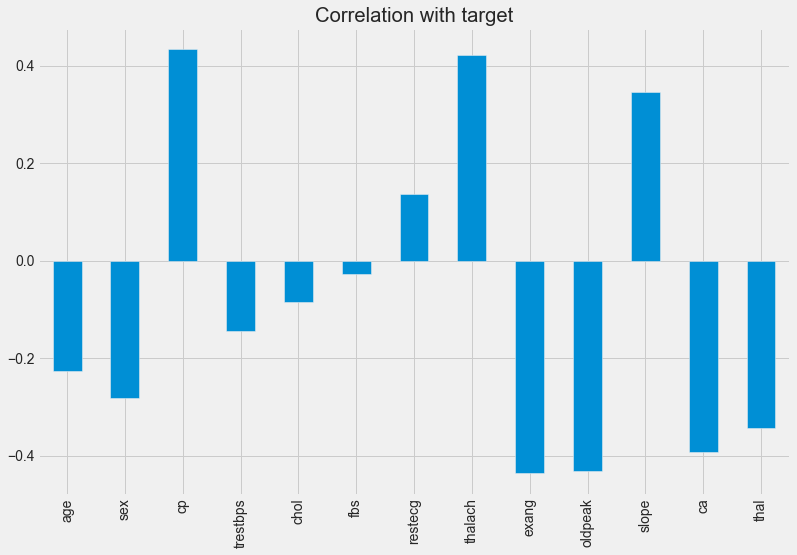

In [13]:
df.drop('target', axis =1 ).corrwith(df.target).plot(kind= 'bar',grid = True,figsize = (12,8),title = "Correlation with target")

In [14]:
categorical_val.remove('target')

dataset = pd.get_dummies(df,columns= categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()

dataset[continous_val] = s_sc.fit_transform(dataset[continous_val])

In [21]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train =True ):
    
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print('Train Result: \n ============================================')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:.2f}%')
        print("___________________________________________")
        print(f'Classification Report : \n{clf_report}')
        print("___________________________________________")
        print(f'Confusion Matrix: \n {confusion_matrix(y_train,pred)}\n')
    elif train ==False:
        
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print('Test Result: \n ============================================')
        print(f'Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%')
        print("___________________________________________")
        print(f'Classification Report : \n{clf_report}')
        print("___________________________________________")
        print(f'Confusion Matrix: \n {confusion_matrix(y_test,pred)}\n')

In [22]:
from sklearn.model_selection import train_test_split


X = dataset.drop('target',axis =1 )

y = dataset.target


X_train ,X_test ,y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42) 

In [23]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)

print_score(lr_clf,X_train,y_train,X_test,y_test,train=True)
print_score(lr_clf,X_train,y_train,X_test,y_test,train=False)

Train Result: 
Accuracy Score : 86.79%
___________________________________________
Classification Report : 
              0      1  accuracy  macro avg  weighted avg
precision  0.88   0.86      0.87       0.87          0.87
recall     0.82   0.90      0.87       0.86          0.87
f1-score   0.85   0.88      0.87       0.87          0.87
support   97.00 115.00      0.87     212.00        212.00
___________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result: 
Accuracy Score : 86.81%
___________________________________________
Classification Report : 
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.87      0.87       0.87          0.87
recall     0.83  0.90      0.87       0.86          0.87
f1-score   0.85  0.88      0.87       0.87          0.87
support   41.00 50.00      0.87      91.00         91.00
___________________________________________
Confusion Matrix: 
 [[34  7]
 [ 5 45]]



As we can see the model test and train accuracy not vary much in test and train so model is working fine.

In [24]:
test_score = accuracy_score(y_test,lr_clf.predict(X_test))*100
train_score = accuracy_score(y_train,lr_clf.predict(X_train))*100

result_df = pd.DataFrame(data=[['Logistic Regression', train_score,test_score]], columns = ['Model', 'Training Accuracy %', 'Testing Accuracy %'])

result_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.79,86.81
